# Conway's Game of Life with PySAL

## Rules ##

   1. A cell that is currently alive and that has two **or** three live neighbors stays alive
   2. A cell that is currently dead with **exactly** three live neighbors comes alive 
   3. All other cells remain dead, or die due to loneliness (less than 2 neighbors) or overcrowding (more than 3 neighbors)

In [1]:
import pysal as ps
from scipy.stats import bernoulli
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
k = 8 # dimension of lattice

In [3]:
w = ps.lat2W(k,k,rook=False)

In [4]:
w.n

64

In [5]:
w.neighbors[0]

[8, 1, 9]

In [6]:
w.neighbors[45]

[36, 37, 38, 44, 53, 46, 54, 52]

In [7]:
w.weights[0]

[1.0, 1.0, 1.0]

In [8]:
y = bernoulli.rvs(0.45,size=w.n)

In [9]:
y

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1])

In [10]:
wy = ps.lag_spatial(w,y)

In [11]:
wy

array([ 0.,  2.,  1.,  2.,  4.,  2.,  3.,  1.,  3.,  4.,  3.,  3.,  4.,
        3.,  5.,  1.,  1.,  1.,  1.,  1.,  4.,  3.,  5.,  1.,  3.,  3.,
        2.,  1.,  4.,  3.,  5.,  2.,  1.,  3.,  3.,  1.,  3.,  3.,  4.,
        3.,  4.,  4.,  4.,  4.,  4.,  4.,  3.,  2.,  3.,  5.,  5.,  3.,
        2.,  3.,  4.,  3.,  2.,  4.,  2.,  3.,  3.,  1.,  2.,  0.])

## Rules ##

   1. A cell that is currently alive and that has two **or** three live neighbors stays alive
   2. A cell that is currently dead with **exactly** three live neighbors comes alive 
   3. All other cells remain dead, or die due to loneliness (less than 2 neighbors) or overcrowding (more than 3 neighbors)

Rule 1: find live cells and count their neighbors

In [12]:
ywy = y*wy

In [13]:
lw23 = np.nonzero( (ywy==2) + (ywy==3) )

In [14]:
lw23

(array([ 3,  5, 13, 21, 29, 37, 46, 47, 48, 51, 52, 56, 58]),)

Rule 2: find dead cells with exactly 3 neighbors

In [15]:
dw3 = (1-y) * wy

In [16]:
np.nonzero(dw3==3)

(array([ 6,  8, 10, 11, 24, 25, 33, 34, 36, 39, 53, 55, 59, 60]),)

Rules 1 and 2 give us the surviving cells

In [17]:
live_next = np.nonzero( (ywy==2) + (ywy==3) + (dw3==3) )

In [18]:
live_next

(array([ 3,  5,  6,  8, 10, 11, 13, 21, 24, 25, 29, 33, 34, 36, 37, 39, 46,
        47, 48, 51, 52, 53, 55, 56, 58, 59, 60]),)

In [19]:
y[live_next]

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0])

So we see that in the future, some dead cells will becoming alive. But what about live cells now that die in the next period?

We know that they will be dead next period. Allocate an array with zeros for the next period and assign the live cells. Everyone else is dead.

In [20]:
y1 = np.zeros_like(y)

In [21]:
y1[live_next] = 1

In [22]:
y1

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0])

In [23]:
def generation(y,w):
    y1 = np.zeros_like(y)
    wy = ps.lag_spatial(w,y)
    ywy = y * wy
    live_next = np.nonzero( ( ywy == 2 ) + ( ywy == 3 ) + ( ( 1-y ) * wy == 3 ) )
    y1[live_next] = 1
    return y1
        

In [24]:
y = bernoulli.rvs(0.45,size=w.n)

In [25]:
y1 = generation(y,w)

In [26]:
y1

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [27]:
y

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1])

In [28]:
y2 = generation(y1,w)

In [29]:
y2

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

One interesting initial pattern is the so called R-pentomino.

We will create one and then run a simulation to see how the solutions evolve.

In [30]:
ngen=350
k = 50
w = ps.lat2W(k, k, rook=False)
#y = bernoulli.rvs(0.45,size=w.n)
y = np.zeros((w.n,))
#R-pentomino pattern
kd2 = k/2
top = kd2 +  k * ( kd2 - 1 )
topr = top + 1
midl = top + k -1
mid = midl + 1
bot = mid + k
y[[top, topr, midl, mid, bot]] = 1
results = {}
for i in xrange(ngen):
    y1 = generation(y,w)
    results[i] = y1
    if np.all(y == y1):
        break
    print i, y.sum(), y1.sum()
    y = y1
    

0 5.0 6.0
1 6.0 7.0
2 7.0 9.0
3 9.0 8.0
4 8.0 9.0
5 9.0 12.0
6 12.0 11.0
7 11.0 18.0
8 18.0 11.0
9 11.0 11.0
10 11.0 10.0
11 10.0 13.0
12 13.0 16.0
13 16.0 19.0
14 19.0 19.0
15 19.0 23.0
16 23.0 25.0
17 25.0 35.0
18 35.0 25.0
19 25.0 32.0
20 32.0 27.0
21 27.0 37.0
22 37.0 30.0
23 30.0 46.0
24 46.0 39.0
25 39.0 45.0
26 45.0 30.0
27 30.0 31.0
28 31.0 29.0
29 29.0 27.0
30 27.0 32.0
31 32.0 32.0
32 32.0 39.0
33 39.0 34.0
34 34.0 29.0
35 29.0 34.0
36 34.0 31.0
37 31.0 34.0
38 34.0 36.0
39 36.0 33.0
40 33.0 31.0
41 31.0 29.0
42 29.0 34.0
43 34.0 31.0
44 31.0 42.0
45 42.0 37.0
46 37.0 36.0
47 36.0 45.0
48 45.0 48.0
49 48.0 64.0
50 64.0 45.0
51 45.0 60.0
52 60.0 50.0
53 50.0 67.0
54 67.0 58.0
55 58.0 66.0
56 66.0 68.0
57 68.0 72.0
58 72.0 72.0
59 72.0 79.0
60 79.0 75.0
61 75.0 80.0
62 80.0 67.0
63 67.0 69.0
64 69.0 73.0
65 73.0 65.0
66 65.0 56.0
67 56.0 61.0
68 61.0 51.0
69 51.0 52.0
70 52.0 54.0
71 54.0 57.0
72 57.0 58.0
73 58.0 55.0
74 55.0 59.0
75 59.0 55.0
76 55.0 57.0
77 57.0 63.0
78 63.0

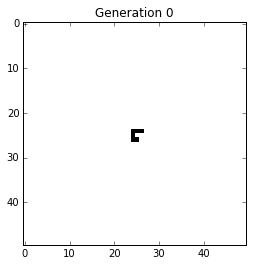

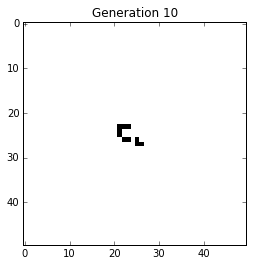

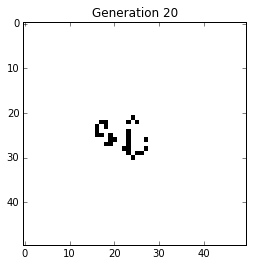

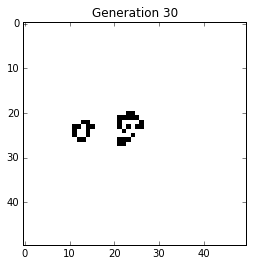

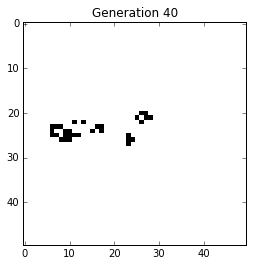

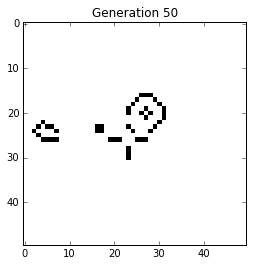

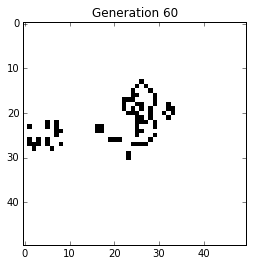

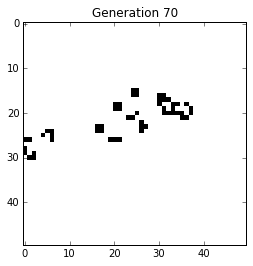

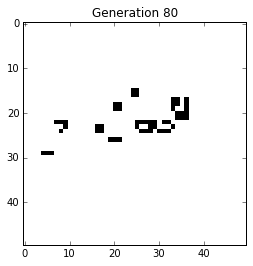

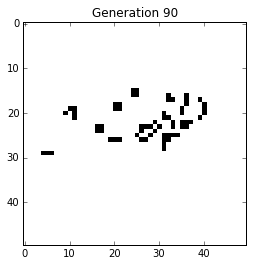

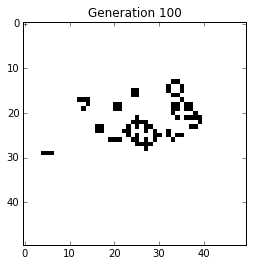

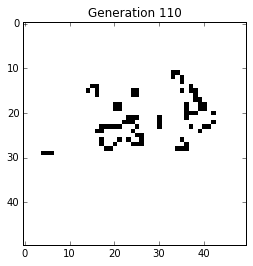

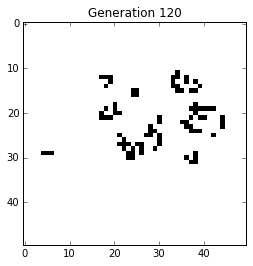

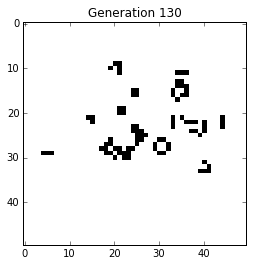

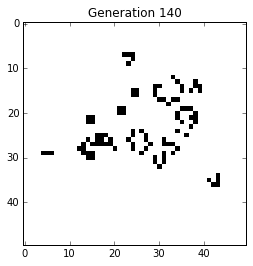

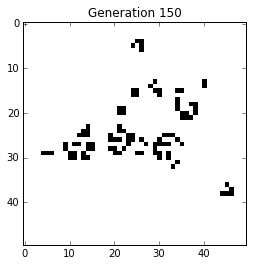

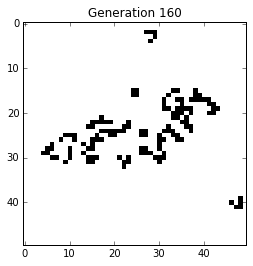

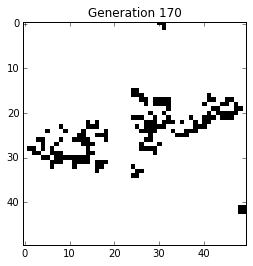

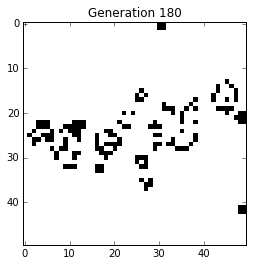

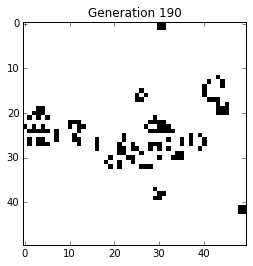

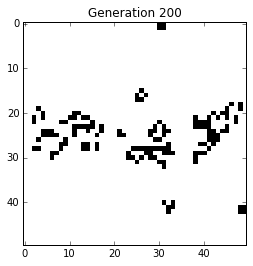

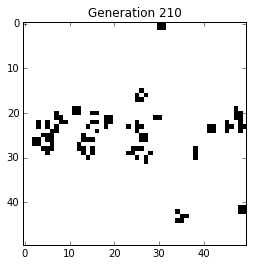

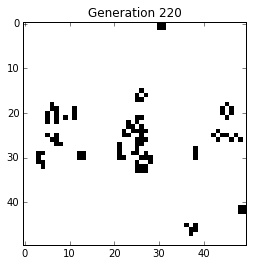

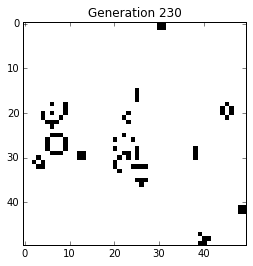

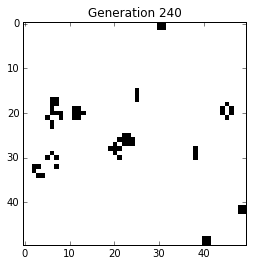

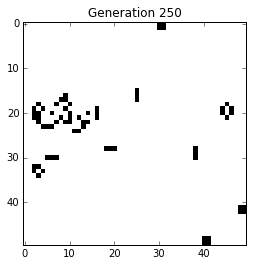

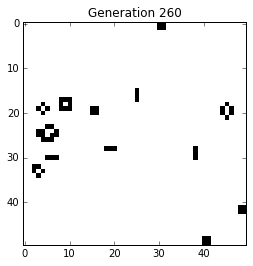

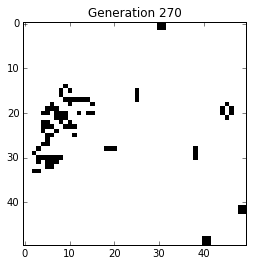

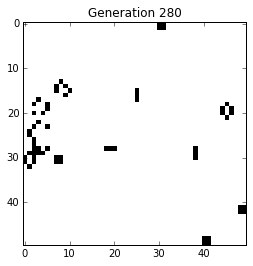

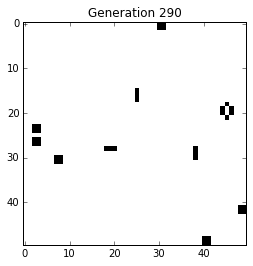

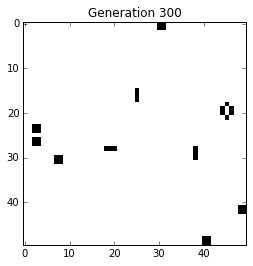

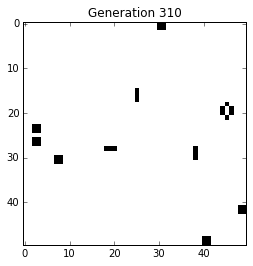

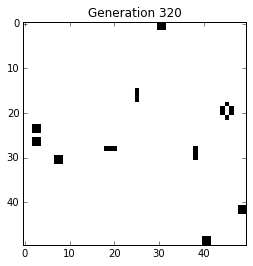

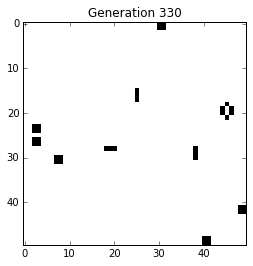

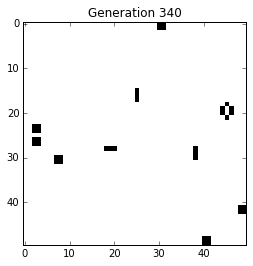

In [31]:
generations = np.zeros((ngen,))
living = np.zeros_like(generations)
keys = results.keys()
keys.sort()
for i in keys:
    generations[i] = i
    living[i] = results[i].sum()
    if not i%10:
        ymat = results[i]
        ymat.shape = (50,50)
        imshow(ymat,cmap='Greys', interpolation='nearest')
        title("Generation %d"%i)
        show()
    

In [32]:
generations.shape

(350,)

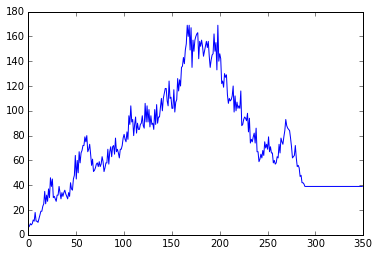

In [33]:
plot(generations,living)

In [34]:
ymat = results[ngen-1]

In [35]:
ymat.shape

(2500,)

In [36]:
ymat.shape=(50,50)

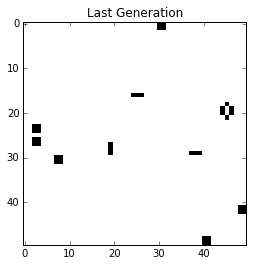

In [37]:
imshow(ymat, cmap='Greys', interpolation='nearest')
title("Last Generation")

In [38]:
ymat = results[0]

In [39]:
ymat.shape = (50,50)

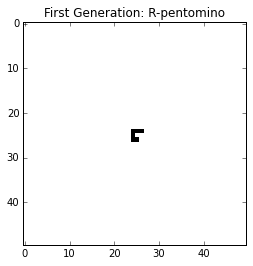

In [40]:
imshow(ymat, cmap='Greys', interpolation='nearest')
title('First Generation: R-pentomino')

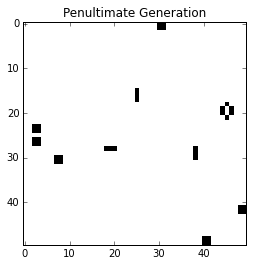

In [41]:
ymat = results[ngen-2]
ymat.shape=(50,50)
imshow(ymat, cmap='Greys', interpolation='nearest')
title("Penultimate Generation")

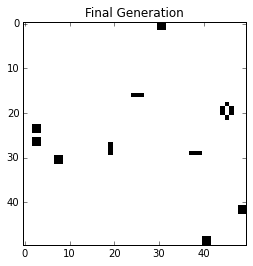

In [42]:
ymat = results[ngen-1]
ymat.shape=(50,50)
imshow(ymat, cmap='Greys', interpolation='nearest')
title("Final Generation")